In [11]:
import data_preparation as dp
import metrics
import tensorflow as tf
import pandas as pd
from keras.preprocessing.text import Tokenizer
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = dp.get_data(path_dialog_acts= "../res/dialog_acts.dat")
df

,class,lines,tokenized
0,6,im looking for a moderately priced restaurant ...,"[im, looking, for, a, moderately, priced, rest..."
1,6,any part of town,"[any, part, of, town]"
2,6,bistro food,"[bistro, food]"
3,3,is there a moderately priced restaurant that s...,"[is, there, a, moderately, priced, restaurant,..."
4,1,yes,[yes]
...,...,...,...
25496,12,what is the price range,"[what, is, the, price, range]"
25497,14,thank you good bye,"[thank, you, good, bye]"
25498,6,im looking for african food,"[im, looking, for, african, food]"
25499,12,whats the address and phone number,"[whats, the, address, and, phone, number]"


In [3]:
# categories y:
y = tf.keras.utils.to_categorical(
    df["class"].to_numpy().reshape(25501), num_classes=15, dtype= "int64"
)
y.shape

(25501, 15)

In [4]:
# create the tokenizer for x:
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(df["lines"])
# integer encode documents
x = t.texts_to_matrix(df["lines"], mode='count')
x.shape

(25501, 785)

In [5]:
# split in test and training data:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(785,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15, activation="softmax")
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2023-09-13 11:43:23.996564: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
history = model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=128)

Epoch 1/3
112/112 [==============================] - 6s 42ms/step - loss: 0.8301 - accuracy: 0.8353 - val_loss: 0.1824 - val_accuracy: 0.9583
Epoch 2/3
112/112 [==============================] - 5s 41ms/step - loss: 0.1381 - accuracy: 0.9658 - val_loss: 0.0949 - val_accuracy: 0.9790
Epoch 3/3
112/112 [==============================] - 4s 34ms/step - loss: 0.0734 - accuracy: 0.9810 - val_loss: 0.0757 - val_accuracy: 0.9807


In [8]:
model.evaluate(x_test, y_test)

240/240 [==============================] - 4s 16ms/step - loss: 0.0718 - accuracy: 0.9821


[0.07180510461330414, 0.982093870639801]

In [9]:
test = model.predict(x_test)
print(y_test[0])
test[0].argmax()


240/240 [==============================] - 4s 16ms/step
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


6

In [28]:
import importlib
importlib.reload(metrics)
y_real = np.argmax(y_test, axis=1)
y_result = np.argmax(test, axis=1)
print(metrics.recall(y_result,y_real, 0 ))
r= sklearn.metrics.precision_score(y_real, y_result, average= None)
print(r)
r = sklearn.metrics.recall_score(y_real, y_result, average= None)
print(r)
#print(metrics.precision(y_result,y_real ))

0.0007842112142203634
[0.         0.99708455 0.95384615 0.7962963  0.         0.90909091
 0.98404429 0.99230769 0.92887029 1.         0.95470383 0.
 0.9964521  0.         0.99679829]
[0.         0.97435897 0.92537313 0.89583333 0.         0.76923077
 0.98532768 0.98473282 0.95483871 0.8        0.97857143 0.
 0.99594732 0.         0.99786325]


/home/robin/anaconda3/envs/uu_mair_chat/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


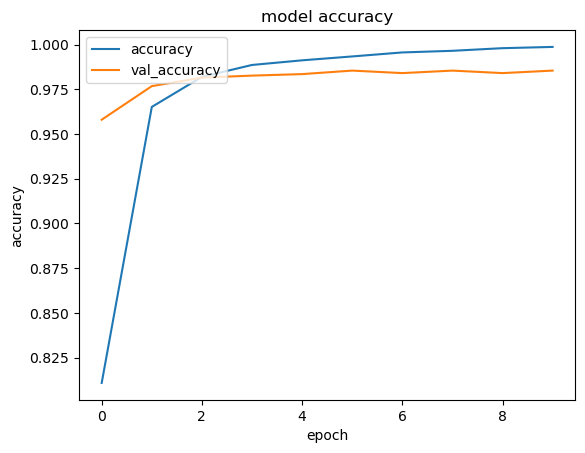

In [ ]:
# Plotting Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()
